In [2]:
from pprint import pprint
from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from pycaret.regression import *

from sktime.utils.plotting import plot_series

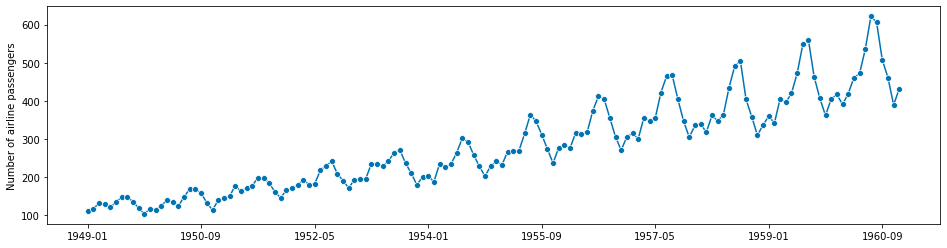

In [22]:
y = get_data('airline', verbose=False)
_ = plot_series(y)

In [23]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=12, fold=3, session_id=42)

,Description,Value
0,session_id,42
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


## Time - series models available

In [24]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True
tbats,TBATS,sktime.forecasting.tbats.TBATS,False


In [25]:
best_baseline_models = exp.compare_models(n_select=3, sort='mape')

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,19.5887,529.3397,0.0498,0.0498,0.8624,0.0767
arima,ARIMA,20.0069,528.2344,0.0501,0.0507,0.8677,0.0767
exp_smooth,Exponential Smoothing,19.7281,532.6976,0.0503,0.0502,0.8607,0.0500
auto_arima,Auto ARIMA,21.0297,602.4566,0.0525,0.0531,0.8509,1.8800
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,24.4233,1017.0008,0.0584,0.0601,0.7169,0.4967
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,25.8293,1290.4445,0.0617,0.0641,0.6260,0.4567
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,26.8586,1450.7603,0.0629,0.0654,0.6023,0.5333
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,27.8200,1437.6933,0.0661,0.0686,0.6015,0.0567
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,29.1314,1567.8077,0.0685,0.0715,0.5855,0.0367
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,28.7738,1339.5259,0.0698,0.0722,0.6255,0.0267


In [9]:
best_baseline_models

[AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
         bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
         error='add', freq=None, full_output=True, information_criterion='aic',
         initial_level=None, initial_seasonal=None, initial_trend=None,
         initialization_method='estimated', maxiter=1000, missing='none',
         n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
         start_params=None, trend='add'),
 ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 12),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True),
 ExponentialSmoothing(damped_trend=False, initial_level=None,
                      initial_seasonal=None, initial_trend=None,
                      initialization_method='estimated', seasonal='add', sp=12,
                      trend='add', use_boxcox=None

In [26]:
best_tuned_models = [exp.tune_model(model, n_iter = 20, optimize = 'mape') for model in best_baseline_models]
#custom_grid
best_tuned_models

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,13.7396,317.0194,0.0347,0.0355,0.8968
1,1957-12,24.6240,730.8658,0.0684,0.0656,0.8085
2,1958-12,20.8208,550.2076,0.0480,0.0494,0.8769
Mean,nan,19.7281,532.6976,0.0503,0.0502,0.8607
SD,nan,4.5102,169.4051,0.0138,0.0123,0.0378


[AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
         bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
         error='add', freq=None, full_output=True, information_criterion='aic',
         initial_level=None, initial_seasonal=None, initial_trend=None,
         initialization_method='estimated', maxiter=1000, missing='none',
         n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
         start_params=None, trend='add'),
 ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 24),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True),
 ExponentialSmoothing(damped_trend=False, initial_level=None,
                      initial_seasonal=None, initial_trend=None,
                      initialization_method='estimated', seasonal='add', sp=12,
                      trend='add', use_boxcox=Fals

## Blend

In [27]:
mean_blender = exp.blend_models(best_tuned_models, optimize='MAPE', method='mean')

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,16.0129,428.0689,0.0399,0.0411,0.8607
1,1957-12,20.8467,523.8570,0.0576,0.0558,0.8628
2,1958-12,17.5962,411.0955,0.0399,0.0409,0.9080
Mean,nan,18.1519,454.3405,0.0458,0.0459,0.8772
SD,nan,2.0121,49.6416,0.0084,0.0070,0.0219


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,EnsembleForecaster,18.8166,22.1226,0.0379,0.0385,0.9117


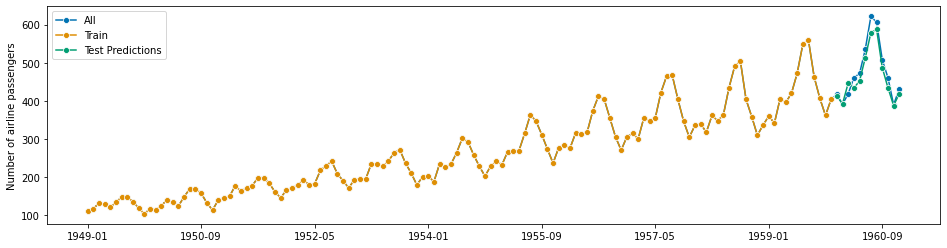

In [28]:
y_pred = exp.predict_model(mean_blender)
y_train = exp.get_config("y_train")
_ = plot_series(y, y_train, y_pred[0], labels=['All', 'Train', 'Test Predictions'])

## Finalize model

In [29]:
final_model = exp.finalize_model(mean_blender)

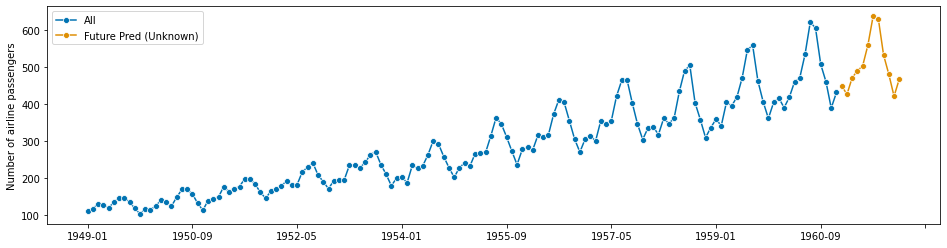

In [30]:
y_pred_future = exp.predict_model(final_model, verbose=False)
_ = plot_series(y, y_pred_future[0], labels=['All', 'Future Pred (Unknown)'])

In [31]:
_ = exp.save_model(final_model, 'airline_ts_ensemble_model', model_only=True)

Transformation Pipeline and Model Successfully Saved


In [32]:
loaded_model = exp.load_model('airline_ts_ensemble_model')

Transformation Pipeline and Model Successfully Loaded


In [33]:
y_pred_future = exp.predict_model(loaded_model, verbose=False)

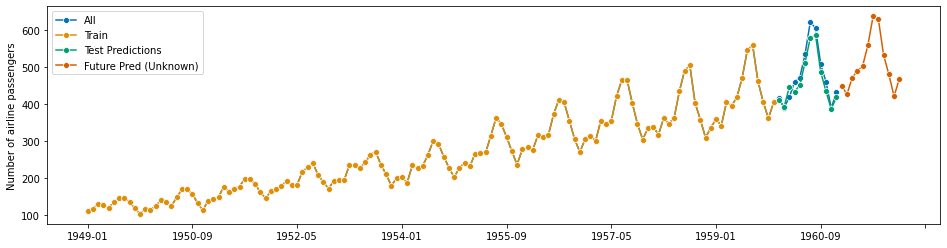

In [34]:
_ = plot_series(y, y_train, y_pred[0], y_pred_future[0], labels=['All', 'Train', 'Test Predictions', 'Future Pred (Unknown)'])